In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:

# train_dir = '/kaggle/input/fer2013/train'
# val_dir = '/kaggle/input/fer2013/test'

# BATCH_SIZE=64
# IMG_SIZE=(48,48)

# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)
# train_datagen = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     color_mode="grayscale",
#     class_mode='categorical',
#     shuffle=True)
# val_datagen = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     color_mode="grayscale",
#     class_mode='categorical',
#     shuffle=True)



# images, labels = train_datagen.next()
# print(images.shape)
# # Plot the images
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
# axes = axes.flatten()

# for i, ax in enumerate(axes):
#     ax.imshow(images[i].squeeze(), cmap='gray')
#     ax.set_title('Label: {}'.format(np.argmax(labels[i])))
#     ax.axis('off')

# plt.tight_layout()
# plt.show()




In [3]:
# def plot_label_distribution(labels):
#     label_counts = {}
#     for label in labels:
#         label_counts[label] = label_counts.get(label, 0) + 1
    
#     labels = list(label_counts.keys())
#     counts = list(label_counts.values())
    
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x=labels, y=counts)
#     plt.xlabel('Labels')
#     plt.ylabel('Counts')
#     plt.title('Label Distribution')
#     plt.show()
# all_labels = train_datagen.classes
# # Phân bố các nhãn trong tập dữ liệu
# plot_label_distribution(all_labels)

In [4]:
train_dir = '/kaggle/input/fer2013/train'
test_dir = '/kaggle/input/fer2013/test'

BATCH_SIZE=64
IMG_SIZE=(48,48)
SEED=11
VALIDATION_SPLIT=0.2

train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                                 shuffle=True,
                                                                 seed=SEED,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE, 
                                                                 validation_split=VALIDATION_SPLIT,
                                                                 label_mode='categorical',
                                                                 subset='training',
                                                                 color_mode='grayscale')
val_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                                 shuffle=True,
                                                                 seed=SEED,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE, 
                                                                 validation_split=VALIDATION_SPLIT,
                                                                 label_mode='categorical',
                                                                 subset='validation',
                                                                 color_mode='grayscale')
test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 seed=SEED,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 color_mode='grayscale')

Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
Found 7178 files belonging to 7 classes.


Class name:  ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Number of class:  7


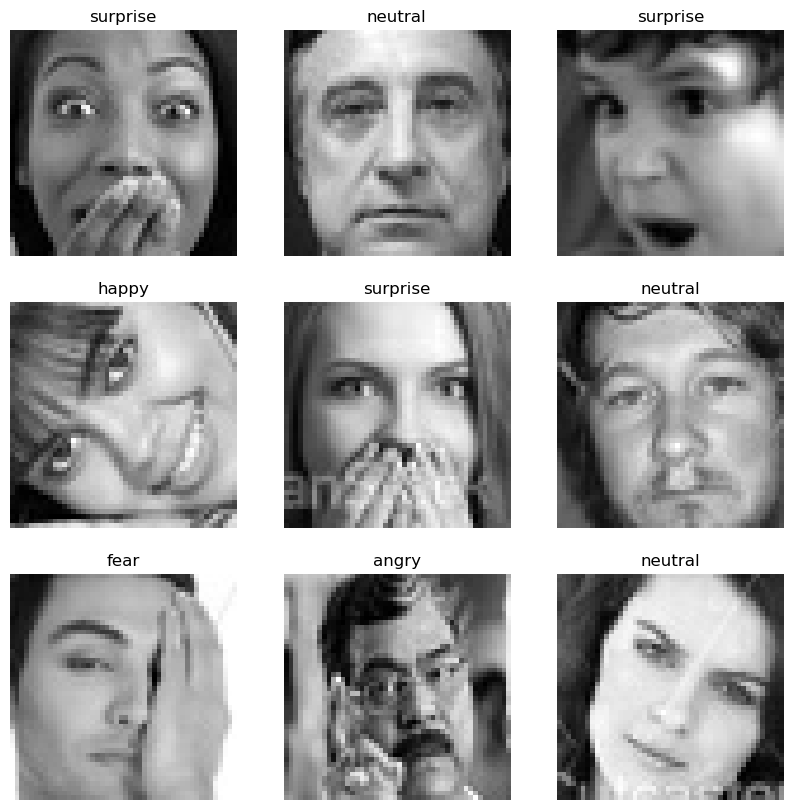

In [5]:
class_names = train_data.class_names
print('Class name: ',class_names)
num_classes=len(class_names)
print('Number of class: ',num_classes)

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")
    


Text(0.5, 1.0, 'Labels Distribution')

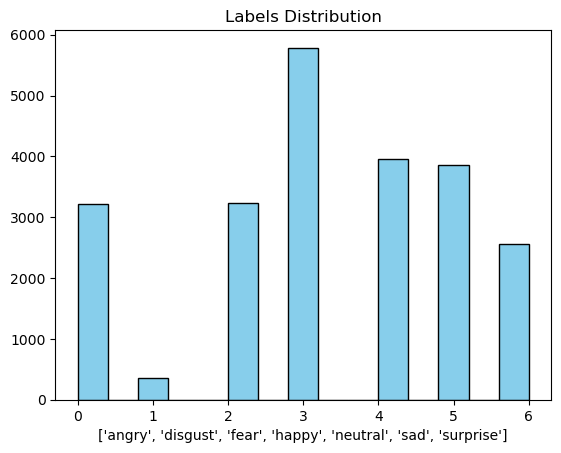

In [6]:

labels_first = []
for batch in train_data:
    _, label = batch  # Assuming the labels are in the second position of each batch
    labels_first.extend(label.numpy())  # Append labels to the list
# Plot the histogram
plt.hist(np.argmax(labels_first,axis=1), bins=15, color='skyblue', edgecolor='black') 
plt.xlabel(class_names)
plt.title('Labels Distribution')


In [7]:
# def plot_label_distribution(labels):
#     label_counts = {}
#     for label in labels:
#         label_counts[label] = label_counts.get(label, 0) + 1
    
#     labels = list(label_counts.keys())
#     counts = list(label_counts.values())
    
#     plt.figure(figsize=(8, 6))
#     sns.barplot(x=labels, y=counts)
#     plt.xlabel('Labels')
#     plt.ylabel('Counts')
#     plt.title('Label Distribution')
#     plt.show()
    
# # Phân bố các nhãn trong tập dữ liệu
# plot_label_distribution(labels_first)

In [8]:
# Extract the images and labels from the generator1
filtered_images = []
filtered_labels = []
disgust_data = []
disgust_label = []
filtered_high_images = []
filtered_high_labels = []
filtered_low_images = []
filtered_low_labels = []
        
print('extract image')
for images, labels in train_data: 
    for j in range(images.shape[0]):
        image_contrast = np.mean(images[j])
        if image_contrast > 229:
            filtered_high_images.append(images[j])
            filtered_high_labels.append(labels[j])
        elif image_contrast < 25:
            filtered_low_images.append(images[j])
            filtered_low_labels.append(labels[j])
        elif image_contrast >= 25 and image_contrast <= 229:
            if labels[j][1] != 1:
                filtered_images.append(images[j])
                filtered_labels.append(labels[j])
            elif labels[j][1] == 1:
                disgust_data.append(images[j])
                disgust_label.append(labels[j])
                
filtered_images = np.array(filtered_images)
filtered_labels = np.array(filtered_labels)
filtered_high_images = np.array(filtered_high_images)
filtered_high_labels = np.array(filtered_high_labels)
filtered_low_images = np.array(filtered_low_images)
filtered_low_labels = np.array(filtered_low_labels)
disgust_data = np.array(disgust_data)
disgust_label = np.array(disgust_label)

print('length filtered_images', len(filtered_images))
print('length disgust_data', len(disgust_data))
print('length filtered_high_images', len(filtered_high_images))
print('length filtered_low_images', len(filtered_low_images))
# data_train_flat = filtered_images.reshape(filtered_images.shape[0], -1)



extract image
length filtered_images 22573
length disgust_data 359
length filtered_high_images 17
length filtered_low_images 19


In [9]:
import imgaug.augmenters as iaa

# Assuming your original image data is stored in 'original_data' ndarray
# with a shape of (436, 48, 48, 1)

# Calculate the number of augmented images you want to generate per original image
num_augmentations = 4  # Change this according to your needs

# Create an augmentation sequence
augmentation_seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontally with a 50% chance
    iaa.Affine(rotate=(-10, 10)),  # Rotate the image by -10 to 10 degrees
])

# Initialize empty lists to store augmented images and labels
augmented_data = []
augmented_labels = []

# Perform random augmentation for each original image
for i in range(disgust_data.shape[0]):
    image = disgust_data[i]
    label = disgust_label[i]

    # Augment the image multiple times
    for _ in range(num_augmentations):
        augmented_image = augmentation_seq.augment_image(image)
        augmented_data.append(augmented_image)
        augmented_labels.append(label)

# Convert the lists to numpy arrays
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

# Concatenate the augmented data with the original data
disgust_data_agm = np.concatenate((disgust_data, augmented_data), axis=0)

# Concatenate the augmented labels with the original labels
disgust_labels_agm = np.concatenate((disgust_label, augmented_labels), axis=0)

In [10]:
print(len(disgust_data_agm))
print(type(disgust_data_agm))

1795
<class 'numpy.ndarray'>


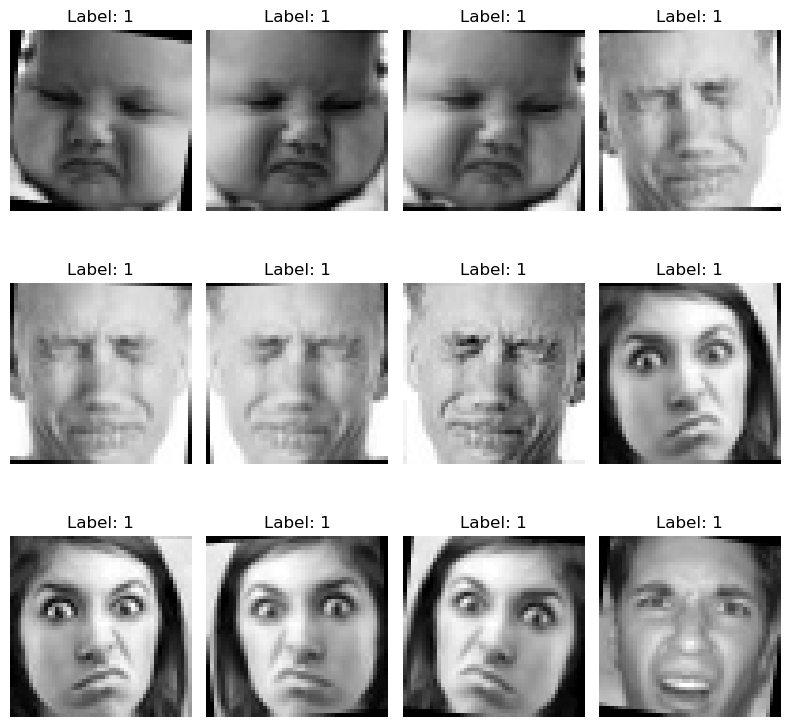

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(disgust_data_agm[i+436], cmap='gray')
    ax.set_title('Label: {}'.format(np.argmax(disgust_labels_agm[i+436])))
    ax.axis('off')

plt.tight_layout()
plt.show()

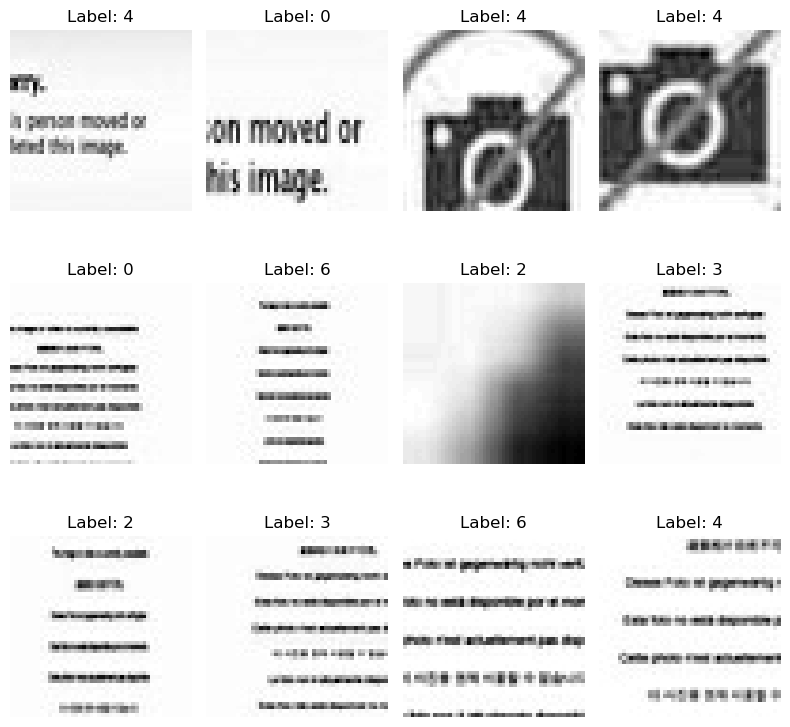

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(filtered_high_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(np.argmax(filtered_high_labels[i])))
    ax.axis('off')

plt.tight_layout()
plt.show()

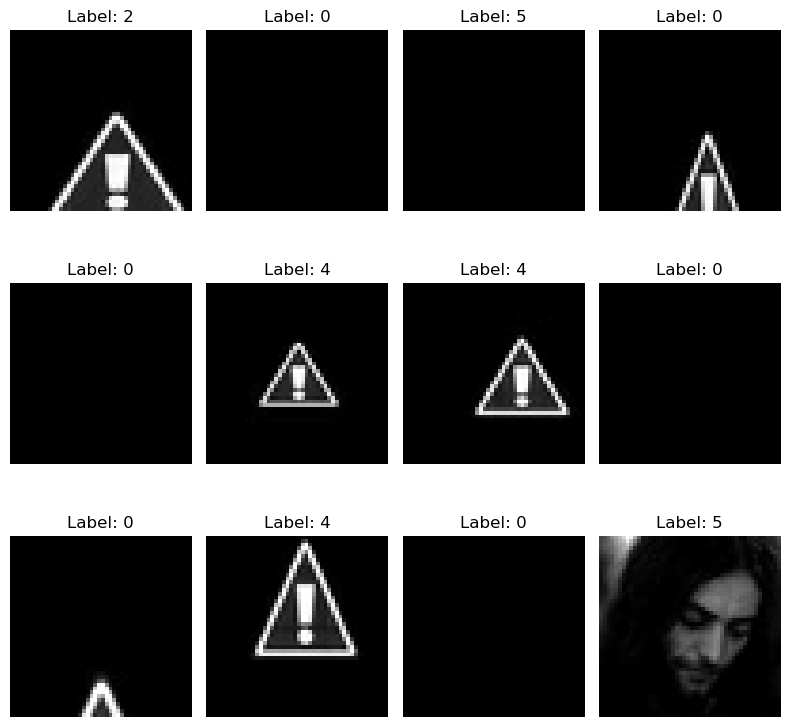

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(filtered_low_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(np.argmax(filtered_low_labels[i])))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [14]:
final_train_data = np.concatenate((filtered_images, disgust_data_agm))
final_train_labels = np.concatenate((filtered_labels, disgust_labels_agm))

In [15]:
a=np.argmax(final_train_labels,axis=1)

Text(0, 0.5, 'Frequency')

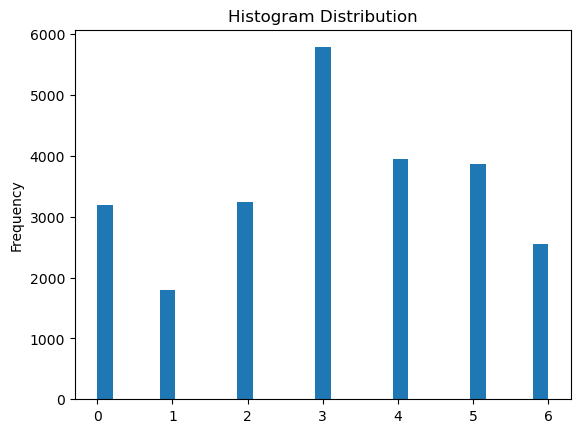

In [16]:
plt.hist(a, bins='auto')
plt.title('Histogram Distribution')
plt.ylabel('Frequency')

In [17]:

IMG_SHAPE=IMG_SIZE+(1,)
num_classes = 7

model = Sequential()

# First convolutional layer
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(IMG_SHAPE)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the input for the fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(final_train_data,final_train_labels, epochs=50, validation_data=val_data)

Epoch 1/50
762/762 [==============================] - 22s 16ms/step - loss: 2.3019 - accuracy: 0.2413 - val_loss: 1.8035 - val_accuracy: 0.2834
Epoch 2/50
762/762 [==============================] - 5s 7ms/step - loss: 1.7672 - accuracy: 0.3019 - val_loss: 1.7640 - val_accuracy: 0.3060
Epoch 3/50
762/762 [==============================] - 6s 7ms/step - loss: 1.6442 - accuracy: 0.3619 - val_loss: 1.6497 - val_accuracy: 0.3541
Epoch 4/50
762/762 [==============================] - 5s 7ms/step - loss: 1.5003 - accuracy: 0.4295 - val_loss: 1.6350 - val_accuracy: 0.3705
Epoch 5/50
762/762 [==============================] - 5s 7ms/step - loss: 1.3605 - accuracy: 0.4841 - val_loss: 1.5965 - val_accuracy: 0.3984
Epoch 6/50
762/762 [==============================] - 6s 8ms/step - loss: 1.2314 - accuracy: 0.5372 - val_loss: 1.6381 - val_accuracy: 0.4067
Epoch 7/50
762/762 [==============================] - 7s 9ms/step - loss: 1.0983 - accuracy: 0.5899 - val_loss: 1.6711 - val_accuracy: 0.4072
Epoc

In [19]:
model.save('LeNet5_grayscale_classification_model.h5')

In [20]:
# train_dir = '/kaggle/input/fer2013/train'
# test_dir = '/kaggle/input/fer2013/test'

# BATCH_SIZE=64
# IMG_SIZE=(48,48)
# SEED=11
# VALIDATION_SPLIT=0.2

# train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
#                                                                  shuffle=True,
#                                                                  seed=SEED,
#                                                                  batch_size=BATCH_SIZE,
#                                                                  image_size=IMG_SIZE, 
#                                                                  validation_split=VALIDATION_SPLIT,
#                                                                  label_mode='categorical',
#                                                                  subset='training',
#                                                                  color_mode='grayscale')
# val_data = tf.keras.utils.image_dataset_from_directory(train_dir,
#                                                                  shuffle=True,
#                                                                  seed=SEED,
#                                                                  batch_size=BATCH_SIZE,
#                                                                  image_size=IMG_SIZE, 
#                                                                  validation_split=VALIDATION_SPLIT,
#                                                                  label_mode='categorical',
#                                                                  subset='validation',
#                                                                  color_mode='grayscale')
# test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
#                                                                  shuffle=True,
#                                                                  seed=SEED,
#                                                                  batch_size=BATCH_SIZE,
#                                                                  image_size=IMG_SIZE,
#                                                                  label_mode='categorical',
#                                                                  color_mode='grayscale')

In [21]:
# class_names = train_data.class_names
# print('Class name: ',class_names)
# num_classes=len(class_names)
# print('Number of class: ',num_classes)

# plt.figure(figsize=(10, 10))
# for images, labels in train_data.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"),cmap='gray')
#     plt.title(class_names[np.argmax(labels[i])])
#     plt.axis("off")